## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing

In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
coldrop = df.isnull().sum()[df.isnull().sum()>(0.35*df.shape[0])]
coldrop

Cabin    687
dtype: int64

<font size='3'>By rule of thumb, we drop the columns with 35% or more Null Values</font>

In [6]:
icd = coldrop.index
df.drop(icd,axis=1,inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Filling the numerical Null values with their mean.

In [9]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
df.describe(include='object')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


Since, $Embarked$ is a categorical variable, it cannot be filled with mean, instead we use the mode of that column to fill Null Values

In [11]:
df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

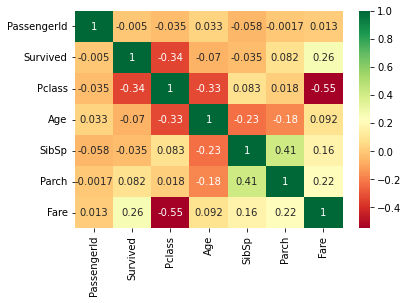

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [13]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

<b> Family Size = $SibSp$ + $Parch$</b>

<AxesSubplot:>

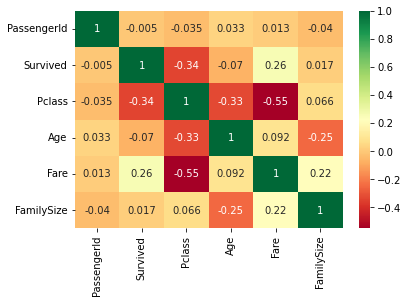

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:>

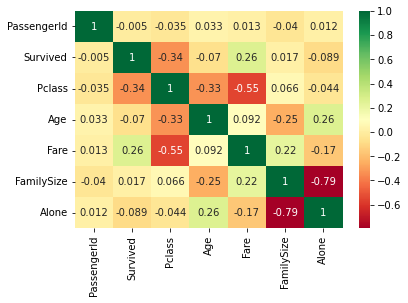

In [15]:
df['Alone'] = [0 if df['FamilySize'][i]>1 else 1 for i in df.index]
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<b> Alone = 1 <br>Not Alone = 0</b>

<AxesSubplot:>

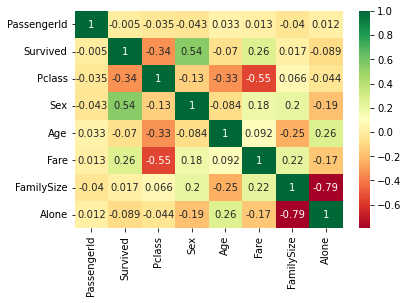

In [16]:
df['Sex'] = [0 if df['Sex'][i]=='male' else 1 for i in df.index]
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<b> Female = 1 <br>Male = 0</b>

In [17]:
from sklearn import preprocessing

In [18]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
labenc = preprocessing.LabelEncoder()
df['Embarked'] = labenc.fit_transform(df['Embarked'])
df.Embarked.unique()

array([2, 0, 1])

In [20]:
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [21]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.466321
1    0.361032
Name: Survived, dtype: float64

In [22]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
0    0.553571
1    0.389610
2    0.339009
Name: Survived, dtype: float64

## Splitting Dataset, Dependent & Independent Variables

<b> Dependent Variable </b>- $Survived$ <br>
<b> Independent Variables </b>- $Pclass$ , $Sex$ , $Age$ , $Emabrked$ , $FamilySize$ , $Alone$

In [24]:
x = df[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'Alone']]
y = df[['Survived']]

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.50)

# Logistic Regression

## Fitting the Model

In [62]:
logreg = LogisticRegression()

In [63]:
logreg.fit(x_train,y_train)

LogisticRegression()

<b>Evaluating Fit of model on Training Dataset:</b>

In [64]:
train_pred = logreg.predict(x_train)

In [65]:
logreg.score(x_train,y_train)

0.8202247191011236

In [66]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       270
           1       0.80      0.72      0.76       175

    accuracy                           0.82       445
   macro avg       0.82      0.80      0.81       445
weighted avg       0.82      0.82      0.82       445



<b>The model has an Accuracy of $82.02$% on Training Data</b>

<b>Evaluating Fit of model on Test Dataset:</b>

In [67]:
test_pred = logreg.predict(x_test)

In [68]:
logreg.score(x_test,y_test)

0.7847533632286996

In [69]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       279
           1       0.72      0.71      0.71       167

    accuracy                           0.78       446
   macro avg       0.77      0.77      0.77       446
weighted avg       0.78      0.78      0.78       446



<b>The model has an Accuracy of $78.48$% on Test Data</b>

In [70]:
y_pred = logreg.predict(x)

In [71]:
logreg.score(x,y)

0.8024691358024691

In [72]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



<b>The model has an Accuracy of $80.25$% on Test Data</b>

# Naive Bayes Classifiers

In [73]:
from sklearn.naive_bayes import GaussianNB

### Fitting a Model

In [74]:
nbc = GaussianNB()

In [75]:
nbc.fit(x_train,y_train)

GaussianNB()

In [76]:
y_train_pred = nbc.predict(x_train)

In [78]:
nbc.score(x_train,y_train)

0.8067415730337079

In [80]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       270
           1       0.76      0.75      0.75       175

    accuracy                           0.81       445
   macro avg       0.80      0.80      0.80       445
weighted avg       0.81      0.81      0.81       445



<b>The model has an Accuracy of $80.67$% on Training Data</b>

In [81]:
y_test_pred = nbc.predict(x_test)

In [82]:
nbc.score(x_test,y_test)

0.7645739910313901

In [83]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       279
           1       0.67      0.72      0.70       167

    accuracy                           0.76       446
   macro avg       0.75      0.76      0.75       446
weighted avg       0.77      0.76      0.77       446



<b>The model has an Accuracy of $76.46$% on Test
   Data</b>

In [84]:
y_pred = nbc.predict(x)

In [85]:
nbc.score(x,y)

0.7856341189674523

In [86]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       549
           1       0.71      0.74      0.73       342

    accuracy                           0.79       891
   macro avg       0.77      0.78      0.77       891
weighted avg       0.79      0.79      0.79       891



<b>The model has an Accuracy of $78.56$% on the Data</b>

# K-Nearest Neighbours

In [88]:
from sklearn.neighbors import KNeighborsClassifier

### Fitting a Model

In [90]:
knn = KNeighborsClassifier(n_neighbors=2)

In [91]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [92]:
train_pred = knn.predict(x_train)

In [93]:
knn.score(x_train,y_train)

0.849438202247191

In [94]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       270
           1       0.95      0.65      0.77       175

    accuracy                           0.85       445
   macro avg       0.88      0.81      0.83       445
weighted avg       0.87      0.85      0.84       445



<b>The model has an accuracy of $84.94$% on the Training Dataset

In [95]:
test_pred = knn.predict(x_test)

In [96]:
knn.score(x_test,y_test)

0.7556053811659192

In [97]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       279
           1       0.75      0.52      0.61       167

    accuracy                           0.76       446
   macro avg       0.75      0.71      0.72       446
weighted avg       0.75      0.76      0.74       446



<b>The model has an accuracy of $75.56$% on the Test Dataset

In [98]:
y_pred = knn.predict(x)

In [99]:
knn.score(x,y)

0.8024691358024691

In [100]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       549
           1       0.85      0.59      0.70       342

    accuracy                           0.80       891
   macro avg       0.82      0.76      0.77       891
weighted avg       0.81      0.80      0.79       891



<b>The model has an accuracy of $80.25$% on the Dataset

# Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier

### Fitting a Model

In [102]:
dtree = DecisionTreeClassifier()

In [103]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
train_pred = dtree.predict(x_train)

In [105]:
dtree.score(x_train,y_train)

0.9483146067415731

In [106]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       270
           1       0.98      0.89      0.93       175

    accuracy                           0.95       445
   macro avg       0.96      0.94      0.94       445
weighted avg       0.95      0.95      0.95       445



<b>The model has an accuracy of $94.83$% on the Training Dataset

In [107]:
test_pred = dtree.predict(x_test)

In [108]:
dtree.score(x_test,y_test)

0.7802690582959642

In [109]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       279
           1       0.70      0.71      0.71       167

    accuracy                           0.78       446
   macro avg       0.77      0.77      0.77       446
weighted avg       0.78      0.78      0.78       446



<b>The model has an accuracy of $78.03$% on the Test Dataset

In [110]:
y_pred = dtree.predict(x)

In [111]:
dtree.score(x,y)

0.8641975308641975

In [112]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       549
           1       0.84      0.80      0.82       342

    accuracy                           0.86       891
   macro avg       0.86      0.85      0.86       891
weighted avg       0.86      0.86      0.86       891



<b>The model has an accuracy of $86.42$% on the Dataset

# Support Vector Machines

In [113]:
from sklearn import svm

### Fitting a Model

In [115]:
sv = svm.SVC(kernel='linear')

In [116]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [117]:
train_pred = sv.predict(x_train)

In [118]:
sv.score(x_train,y_train)

0.7932584269662921

In [119]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       270
           1       0.77      0.67      0.72       175

    accuracy                           0.79       445
   macro avg       0.79      0.77      0.78       445
weighted avg       0.79      0.79      0.79       445



<b>The model has an accuracy of $79.33$% on the Training Dataset

In [120]:
test_pred = sv.predict(x_test)

In [121]:
sv.score(x_test,y_test)

0.7802690582959642

In [122]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       279
           1       0.71      0.69      0.70       167

    accuracy                           0.78       446
   macro avg       0.77      0.76      0.76       446
weighted avg       0.78      0.78      0.78       446



<b>The model has an accuracy of $78.03$% on the Test Dataset

In [123]:
y_pred = sv.predict(x)

In [125]:
sv.score(x,y)

0.7867564534231201

In [126]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



<b>The model has an accuracy of $78.68$% on the Dataset